In [1]:
print("hello")

hello


In [2]:
import numpy as np
import pandas as pd

# Create synthetic data
data = {
    'Muscle_Signal_1': np.random.uniform(0, 1, 100),
    'Muscle_Signal_2': np.random.uniform(0, 1, 100),
    'Movement': np.random.choice(['Grip', 'Release'], 100)  # Output labels
}

# Convert to a DataFrame
df = pd.DataFrame(data)
print(df.head())


   Muscle_Signal_1  Muscle_Signal_2 Movement
0         0.983538         0.053848     Grip
1         0.672787         0.687534     Grip
2         0.057373         0.792372     Grip
3         0.277884         0.931903  Release
4         0.134064         0.849816     Grip


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data into features and labels
X = df[['Muscle_Signal_1', 'Muscle_Signal_2']]
y = df['Movement']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 45.00%


In [5]:
# Convert new_signals to a DataFrame with the same feature names
new_signals_df = pd.DataFrame(new_signals, columns=['Muscle_Signal_1', 'Muscle_Signal_2'])

# Predict using the DataFrame
predicted_movements = model.predict(new_signals_df)

# Visualize predictions
for signal, movement in zip(new_signals_df.values, predicted_movements):
    print(f"Signals: {signal}, Predicted Movement: {movement}")


Signals: [0.87948402 0.43554529], Predicted Movement: Grip
Signals: [0.49982157 0.76146076], Predicted Movement: Grip
Signals: [0.1832873  0.36440405], Predicted Movement: Grip
Signals: [0.9148961  0.81536967], Predicted Movement: Grip
Signals: [0.21112029 0.24402711], Predicted Movement: Grip
Signals: [0.07102616 0.57663329], Predicted Movement: Release
Signals: [0.88668912 0.80394175], Predicted Movement: Grip
Signals: [0.02543948 0.41378571], Predicted Movement: Grip
Signals: [0.93286871 0.34575688], Predicted Movement: Grip
Signals: [0.81240722 0.29411337], Predicted Movement: Grip


Random Forest Model Accuracy: 75.00%
Random Baseline Model Accuracy: 45.00%


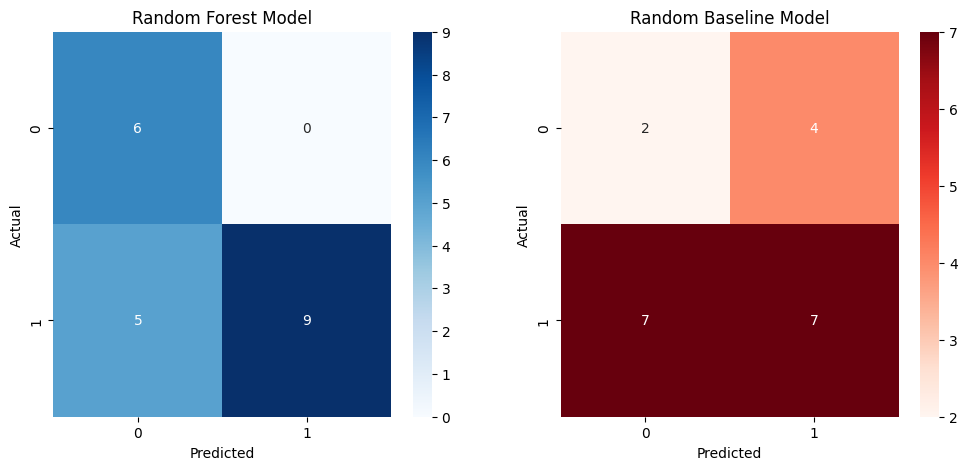


Random Forest Model Performance:
              precision    recall  f1-score   support

        Grip       0.55      1.00      0.71         6
     Release       1.00      0.64      0.78        14

    accuracy                           0.75        20
   macro avg       0.77      0.82      0.74        20
weighted avg       0.86      0.75      0.76        20


Random Baseline Model Performance:
              precision    recall  f1-score   support

        Grip       0.22      0.33      0.27         6
     Release       0.64      0.50      0.56        14

    accuracy                           0.45        20
   macro avg       0.43      0.42      0.41        20
weighted avg       0.51      0.45      0.47        20



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Generate Synthetic Data
np.random.seed(42)
data = {
    'Muscle_Signal_1': np.random.uniform(0, 1, 100),
    'Muscle_Signal_2': np.random.uniform(0, 1, 100),
    'Movement': np.random.choice(['Grip', 'Release'], 100)  # Labels
}
df = pd.DataFrame(data)

# Split Features and Labels
X = df[['Muscle_Signal_1', 'Muscle_Signal_2']]
y = df['Movement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Actual Model (Random Forest)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Baseline Model (Random Predictions)
random_baseline_pred = np.random.choice(['Grip', 'Release'], len(y_test))

# Evaluate Performance
actual_model_acc = accuracy_score(y_test, y_pred)
baseline_acc = accuracy_score(y_test, random_baseline_pred)

print(f"Random Forest Model Accuracy: {actual_model_acc * 100:.2f}%")
print(f"Random Baseline Model Accuracy: {baseline_acc * 100:.2f}%")

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, random_baseline_pred), annot=True, fmt='d', cmap="Reds", ax=axes[1])
axes[1].set_title("Random Baseline Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

# Classification Reports
print("\nRandom Forest Model Performance:")
print(classification_report(y_test, y_pred))

print("\nRandom Baseline Model Performance:")
print(classification_report(y_test, random_baseline_pred))


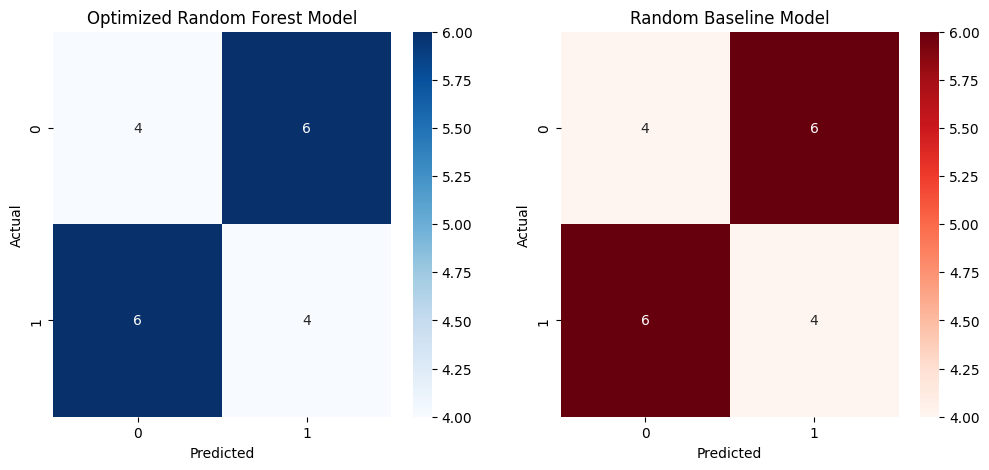

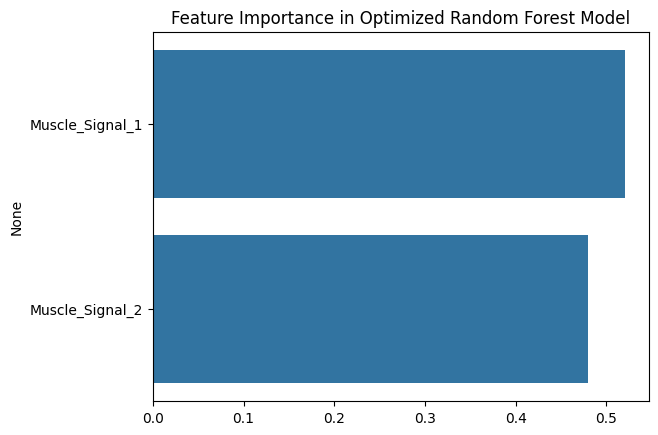

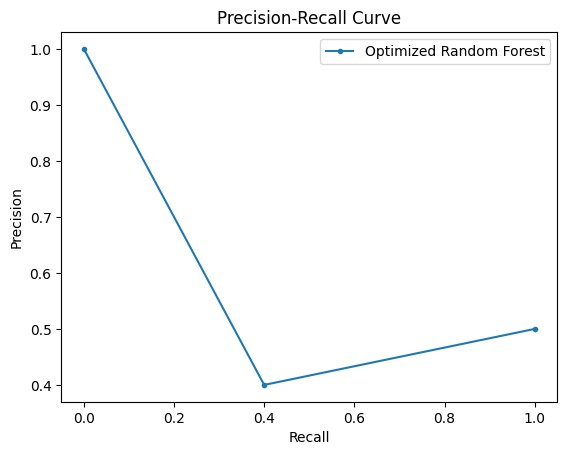

                     Model  Balanced Accuracy
0  Optimized Random Forest                0.4
1          Random Baseline                0.4

Optimized Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        10
           1       0.40      0.40      0.40        10

    accuracy                           0.40        20
   macro avg       0.40      0.40      0.40        20
weighted avg       0.40      0.40      0.40        20


Random Baseline Model Performance:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        10
           1       0.40      0.40      0.40        10

    accuracy                           0.40        20
   macro avg       0.40      0.40      0.40        20
weighted avg       0.40      0.40      0.40        20



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Generate Synthetic Data with Noise
np.random.seed(42)
data = {
    'Muscle_Signal_1': np.random.uniform(0, 1, 100) + np.random.normal(0, 0.05, 100),
    'Muscle_Signal_2': np.random.uniform(0, 1, 100) + np.random.normal(0, 0.05, 100),
    'Movement': np.random.choice(['Grip', 'Release'], 100)
}
df = pd.DataFrame(data)

# Encode Labels
le = LabelEncoder()
df['Movement'] = le.fit_transform(df['Movement'])

# Split Features and Labels
X = df[['Muscle_Signal_1', 'Muscle_Signal_2']]
y = df['Movement']

# Train-Test Split Before Applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle Class Imbalance with SMOTE (Only on Training Data)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Hyperparameter Tuning Using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=20,  # Reduce to a manageable number of trials
                                   cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Train Optimized Random Forest Model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Baseline Model (Random Predictions)
random_baseline_pred = np.random.choice([0, 1], len(y_test))

# Evaluate Performance Using Balanced Accuracy
actual_model_acc = balanced_accuracy_score(y_test, y_pred)
baseline_acc = balanced_accuracy_score(y_test, random_baseline_pred)

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Optimized Random Forest Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, random_baseline_pred), annot=True, fmt='d', cmap="Reds", ax=axes[1])
axes[1].set_title("Random Baseline Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
plt.show()

# Feature Importance Visualization
importances = best_model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Optimized Random Forest Model")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.', label='Optimized Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Accuracy Comparison Table
table = pd.DataFrame({
    'Model': ['Optimized Random Forest', 'Random Baseline'],
    'Balanced Accuracy': [actual_model_acc, baseline_acc]
})
print(table)

# Classification Reports
print("\nOptimized Random Forest Model Performance:")
print(classification_report(y_test, y_pred))
print("\nRandom Baseline Model Performance:")
print(classification_report(y_test, random_baseline_pred))


Random Forest Model Accuracy: 75.00%
Random Baseline Model Accuracy: 45.00%


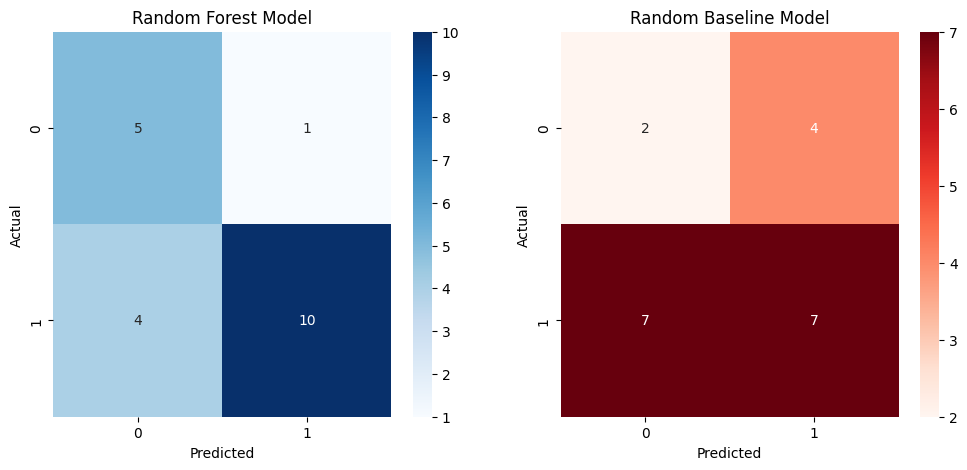

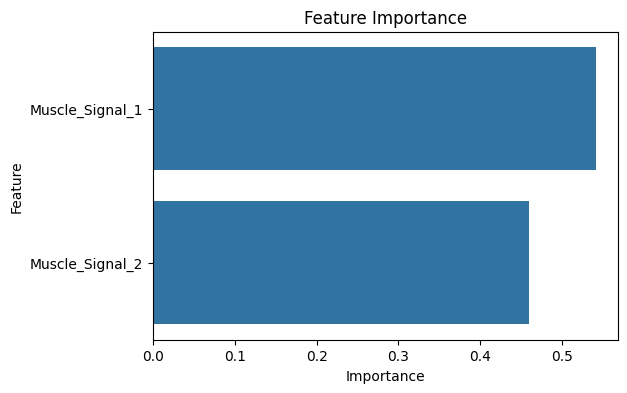

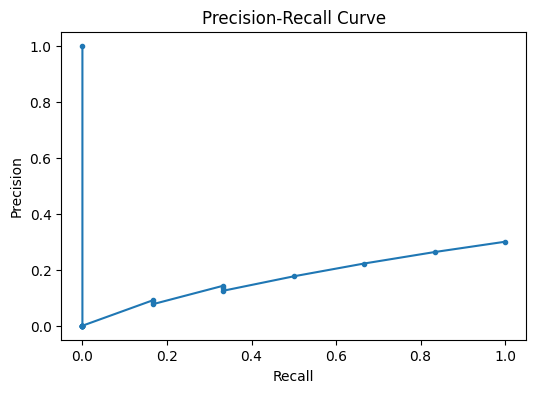

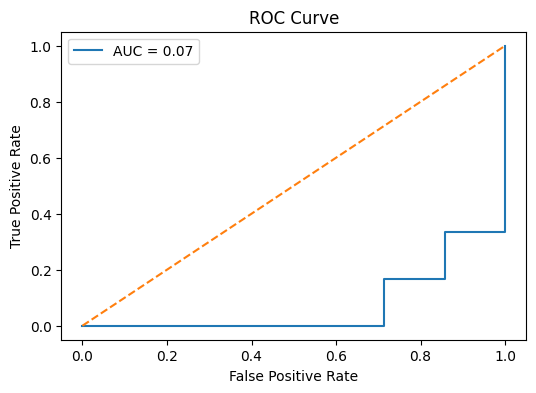

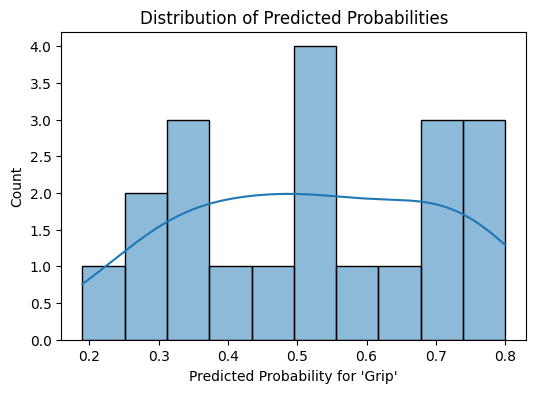


Random Forest Model Performance:
              precision    recall  f1-score   support

        Grip       0.56      0.83      0.67         6
     Release       0.91      0.71      0.80        14

    accuracy                           0.75        20
   macro avg       0.73      0.77      0.73        20
weighted avg       0.80      0.75      0.76        20


Random Baseline Model Performance:
              precision    recall  f1-score   support

        Grip       0.22      0.33      0.27         6
     Release       0.64      0.50      0.56        14

    accuracy                           0.45        20
   macro avg       0.43      0.42      0.41        20
weighted avg       0.51      0.45      0.47        20



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    precision_recall_curve, roc_curve, auc
)

# Generate Synthetic Data
np.random.seed(42)
data = {
    'Muscle_Signal_1': np.random.uniform(0, 1, 100),
    'Muscle_Signal_2': np.random.uniform(0, 1, 100),
    'Movement': np.random.choice(['Grip', 'Release'], 100)  # Labels
}
df = pd.DataFrame(data)

# Split Features and Labels
X = df[['Muscle_Signal_1', 'Muscle_Signal_2']]
y = df['Movement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Actual Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC/PR Curve

# Baseline Model (Random Predictions)
random_baseline_pred = np.random.choice(['Grip', 'Release'], len(y_test))

# Evaluate Performance
actual_model_acc = accuracy_score(y_test, y_pred)
baseline_acc = accuracy_score(y_test, random_baseline_pred)

print(f"Random Forest Model Accuracy: {actual_model_acc * 100:.2f}%")
print(f"Random Baseline Model Accuracy: {baseline_acc * 100:.2f}%")

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, random_baseline_pred), annot=True, fmt='d', cmap="Reds", ax=axes[1])
axes[1].set_title("Random Baseline Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

# Feature Importance Plot
feature_importances = model.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test.map({'Grip': 1, 'Release': 0}), y_prob)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test.map({'Grip': 1, 'Release': 0}), y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')  # Random classifier line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Distribution of Predicted Probabilities
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, bins=10, kde=True)
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability for 'Grip'")
plt.show()

# Classification Reports
print("\nRandom Forest Model Performance:")
print(classification_report(y_test, y_pred))

print("\nRandom Baseline Model Performance:")
print(classification_report(y_test, random_baseline_pred))
